In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Read the City Cemetery data into a pandas DataFrame. **Hint:** see the [`read_excel` function](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [2]:
cc = pd.read_excel('../data/Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx')
cc.head()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of..."
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia


In [3]:
cc.tail()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
19740,4-1846,"Kingsley, A., Capt.",Sep,9.0,28.0,1846.0,M,W,67.0,City,Feever,Cedar,lot,superintendent of Nashville Cemetery
19741,4-1846,infant,Sep,9.0,28.0,1846.0,M,W,NaN,City,Diarherea,Central,lot,son of John Bateman
19742,4-1846,"White, Lucinda",Sep,9.0,29.0,1846.0,F,W,25.0,City,Consumption,Central,200,Fees to be paid by M. Jennings
19743,5-1881,"Higgins, Rebecca",Apr,4.0,10.0,NaN,F,W,68.0,City,Heart Disease,Cherry,lot,"box paid, grave on lot"
19744,5-1881,"Eves, R.",Apr,4.0,25.0,NaN,M,W.,54.0,City,Heart Disease,Magnolia,lot,"box paid, grave on lot"


In [4]:
cc.shape

(19745, 14)

In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19745 entries, 0 to 19744
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Volume                 19745 non-null  object 
 1   Name                   19740 non-null  object 
 2   Burial Month           19706 non-null  object 
 3   Month No.              19706 non-null  float64
 4   Burial Day             19691 non-null  float64
 5   Burial Year            19743 non-null  float64
 6   Sex                    19503 non-null  object 
 7   Race                   19698 non-null  object 
 8   Age                    11071 non-null  float64
 9   Residence              19687 non-null  object 
 10  Cause of Death/Burial  19428 non-null  object 
 11  Ave                    19092 non-null  object 
 12  Section/Lot            18625 non-null  object 
 13  Remarks                16396 non-null  object 
dtypes: float64(4), object(10)
memory usage: 2.1+ MB


In [6]:
#null values
cc.isna().sum()

Volume                      0
Name                        5
Burial Month               39
Month No.                  39
Burial Day                 54
Burial Year                 2
Sex                       242
Race                       47
Age                      8674
Residence                  58
Cause of Death/Burial     317
Ave                       653
Section/Lot              1120
Remarks                  3349
dtype: int64

2. **Most Common Causes of Death.**  
   a. Find the 10 most common (known) recorded causes of death.  
   b. Clean up some of the misspellings. Use the [`replace` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".   
   **Bonus (Save For Last):** One method of detecting and correcting misspellings is fuzzy matching using metrics like [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). Check out [thefuzz](https://github.com/seatgeek/thefuzz) a library that implements fuzzy matching and apply it to detect and correct misspellings.  
   c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.  

In [7]:
# 2a. Find 10 most common (known) recorded causes of death

#look at top causes to determine known causes of deaths and sort in desc
top_10 = cc.groupby("Cause of Death/Burial")["Name"].count().reset_index(name="Occurences")
top_10 = top_10.sort_values("Occurences", ascending=False)
#print(top_10.head(15)) -- verfied rows to remove 

#drop index 1 & 4 "unknown" and "Not known"
top_10 = top_10.drop(top_10.index[[1, 4]])

top_10 = top_10.iloc[:10]
print(top_10)

     Cause of Death/Burial  Occurences
616            Consumption        1767
1972            Still Born         840
433                Cholrea         666
1621               Old Age         604
404                Cholera         575
1759             Pneumonia         516
1027                  Flux         469
518           Complication         446
494                   Cold         421
2047              Teething         411


2b. Clean up some of the misspellings. Use the replace method to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".

In [8]:
#looked at mispellings and identified what needed to be fixed
#deaths = cc.groupby("Cause of Death/Burial")["Name"].count().reset_index(name="Occurences")
#deaths = deaths.sort_values("Occurences", ascending=False)
#print(deaths.head(50))

#used replace to create a dictionary to replace and checked results
cleaned_cc = cc.replace(to_replace = {'Not Known':'Unknown','Typh. Fever':'Typhoid Fever','Pneuminia':'Pneumonia','Cholrea':'Cholera', 'Still Born':'Stillborn','Stil Born':'Stillborn','Stilborn':'Stillborn','Still Bornd':'Stillborn','Measels':'Measles','Teethin':'Teething','Teathing':'Teething','Feever':'Fever','Small Pox':'Smallpox','Scarlot Fever':'Scarlet Fever','Dropsey':'Dropsy','Lock Jaw':'Lockjaw','Hooping Cough':'Whooping Cough','Croop':'Croup','Croope':'Croup','Diarrhaea':'Diarrhea','Diarherea':'Diarrhea','Diarhoera':'Diarrhea','Diarrhoea':'Diarrhea','Pneumonie':'Pneumonia', 'Diphtherie':'Diphtheria', 'Diptheria':'Diphtheria','Dyptheria':'Diphtheria'})
check_cleanup =cleaned_cc.groupby("Cause of Death/Burial")["Name"].count().reset_index(name="Occurences").sort_values("Occurences", ascending=False)
#check_cleanup.head(60) #verified clean up (stopped at row 60)

2c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.

In [9]:
#cleaned top 10
check_cleanup = check_cleanup.drop(check_cleanup.index[0]) #dropped Unknown
top_10_clean = check_cleanup.iloc[:10]
top_10_clean

,Cause of Death/Burial,Occurences
615,Consumption,1767
1953,Stillborn,1282
404,Cholera,1241
1742,Pneumonia,614
1605,Old Age,604
2021,Teething,594
1015,Flux,469
1493,Measles,460
517,Complication,446
855,Dropsy,435


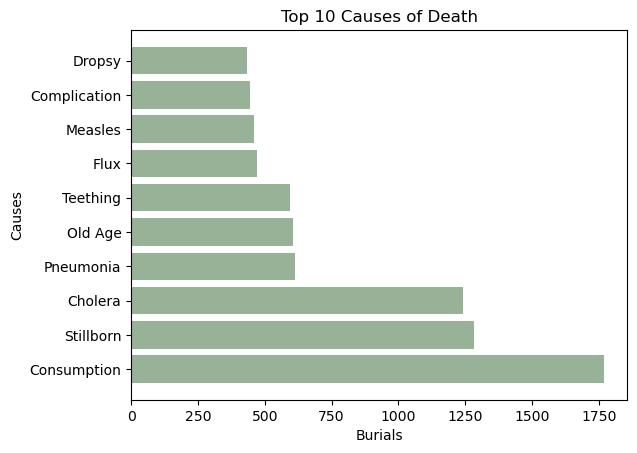

In [10]:
plt.barh(top_10_clean["Cause of Death/Burial"], top_10_clean["Occurences"], color = (0.2, # redness
         0.4, # greenness
         0.2, # blueness
         0.5 # transparency
         ) )

#add titles and axis names
plt.title("Top 10 Causes of Death")
plt.xlabel('Burials')
plt.ylabel('Causes')

#show graph
plt.show()

3. Create a line chart showing the number of burials per year.

Text(0.5, 1.0, 'Nashville City Cemetary Burials per Year')

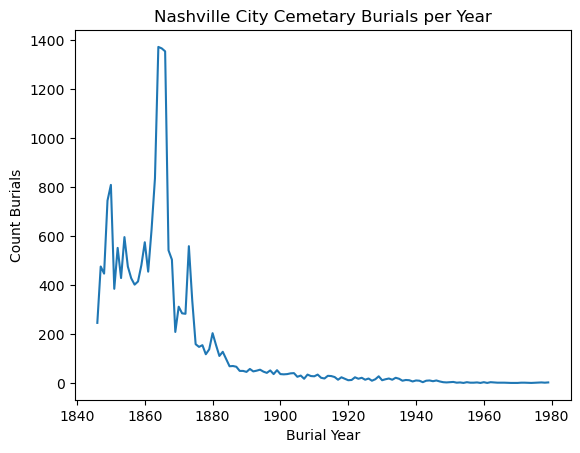

In [11]:
#grouped data by year and counted number of burials
burials_per_year = cleaned_cc.groupby("Burial Year")["Volume"].count().reset_index(name="Count Burials")

#converted int format for burial year to datetime
burials_per_year["Burial Year"] = pd.to_datetime(burials_per_year["Burial Year"], format="%Y")

#plotted data
sns.lineplot(x=burials_per_year["Burial Year"], y=burials_per_year["Count Burials"])
plt.title("Nashville City Cemetary Burials per Year")

4. **Burials per Month and Year**  
    a. Use the [crosstab function](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.  
    b. After creating this summary table, make sure that the year labels are integers (no decimal part) and that the columns are sorted correctly.  
    c. Filter your table to show only the years 1846 through 1860.  
    **Bonus** Display your table so that highlights any months that had over 100 burials. Hint: Look at styling in pandas: https://pandas.pydata.org/pandas-docs/version/1.0/user_guide/style.html  
    d. Go back to your original DataFrame and filter to the year and month that had the largest number of burials. What are the most common causes of death for that month?

4a. Use the crosstab function to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.

In [12]:
cross_cc = pd.crosstab(cleaned_cc["Burial Year"], cleaned_cc["Burial Month"])
cross_cc

Burial Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Burial Year,,,,,,,,,,,,
1846.0,22,0,30,26,20,0,0,25,26,23,39,35
1847.0,35,61,34,34,43,40,47,38,26,36,47,35
1848.0,37,39,27,36,36,65,47,49,41,21,26,23
1849.0,43,36,33,64,46,96,231,64,62,24,18,28
1850.0,29,52,31,26,24,370,120,43,37,28,27,22
...,...,...,...,...,...,...,...,...,...,...,...,...
1972.0,1,0,0,0,0,0,0,0,0,0,0,0
1974.0,0,0,0,0,0,0,0,0,0,1,0,0
1977.0,0,0,0,0,0,0,0,1,1,1,0,0


b. After creating this summary table, make sure that the year labels are integers (no decimal part) and that the columns are sorted correctly.

In [13]:
#make copy
cleaned_copy = cleaned_cc

#drop nulls - error message says infinite data types are in the set
cleaned_copy["Burial Year"] = cleaned_copy["Burial Year"].fillna(0)

#switch type
cleaned_copy["Burial Year"] = cleaned_copy["Burial Year"].astype(int)
#cleaned_copy.isna().sum()
#crosstab
cross_cc2 = pd.crosstab(cleaned_copy["Burial Year"], cleaned_copy["Burial Month"])
cross_cc2

Burial Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Burial Year,,,,,,,,,,,,
0,2,0,0,0,0,0,0,0,0,0,0,0
1846,22,0,30,26,20,0,0,25,26,23,39,35
1847,35,61,34,34,43,40,47,38,26,36,47,35
1848,37,39,27,36,36,65,47,49,41,21,26,23
1849,43,36,33,64,46,96,231,64,62,24,18,28
...,...,...,...,...,...,...,...,...,...,...,...,...
1972,1,0,0,0,0,0,0,0,0,0,0,0
1974,0,0,0,0,0,0,0,0,0,1,0,0
1977,0,0,0,0,0,0,0,1,1,1,0,0


4c. Filter your table to show only the years 1846 through 1860.

In [20]:
#sort and filter years
cleaned_copy = cleaned_copy.sort_values("Burial Year")
cleaned_copy = cleaned_copy[(cleaned_copy["Burial Year"] >= 1846) & (cleaned_copy["Burial Year"] <= 1860)]

#crosstab
cross_cc3 = pd.crosstab(cleaned_copy["Burial Year"], cleaned_copy["Burial Month"])
cross_cc3

Burial Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Burial Year,,,,,,,,,,,,
1846,22,0,30,26,20,0,0,25,26,23,39,35
1847,35,61,34,34,43,40,47,38,26,36,47,35
1848,37,39,27,36,36,65,47,49,41,21,26,23
1849,43,36,33,64,46,96,231,64,62,24,18,28
1850,29,52,31,26,24,370,120,43,37,28,27,22
1851,29,35,37,31,26,49,37,27,26,14,42,32
1852,37,54,36,32,37,76,84,39,58,36,32,31
1853,31,32,31,39,35,47,54,35,36,28,27,34
1854,43,44,30,33,35,95,137,34,61,25,25,34


5. **Burials per Decade**  
    a. Create a "Decade" column to show the decade in which a burial occurred.    
    b. Examine the burials per decade. Look at the total number of burials and the proportion (aka percentage) of male burials and female burials.  
    c. Create a clustered bar chart to show how male and female burials have changed over time.

5a.  Create a "Decade" column to show the decade in which a burial occurred.

In [30]:
#create decade column 
cleaned_cc["Decade"] = (cleaned_cc["Burial Year"] // 10) * 10
cleaned_cc.head()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks,Decade
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot,1970
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of...",1970
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis,1970
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia,1970
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia,1970


b. Examine the burials per decade. Look at the total number of burials and the proportion (aka percentage) of male burials and female burials.

In [44]:
decade_sex = cleaned_cc.groupby(["Decade","Sex"])["Volume"].count()

decade_sex

Decade  Sex  
0       F           1
        M           1
1840    F         869
        FF          1
        M        1034
        N           6
1850    Boy         1
        F        2244
        M        2629
        M & F       1
        M, F        1
        W           1
        m           1
1860    F        3744
        F & M       1
        M        4063
        M & F       2
1870    F        1226
        F & M       1
        G           1
        M        1208
        M, F        1
1880    F         507
        M         467
        M & F       1
1890    F         245
        M         230
1900    D           2
        F         167
        F, M        1
        M         157
1910    F         129
        M         108
1920    F          95
        M          80
        N           1
1930    F          72
        M          70
1940    F          38
        M          40
1950    F          16
        M          11
1960    F           8
        M           7
1970    F         

6. **Burials per Age Group**  
    a. Add a column to the original dataset to classify each row to one of the following categories (0-18, 19-25, 26-40, 41-64, and 65+). (Hint: One way to do this is using the [`cut` function](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)).  
    b. Create a "Year Group" dividing the records up based on burial year. Use the following groups: Before 1880, 1880-1900, 1901-1920, After 1920.  
    c. Use a grouped bar chart to show how the proportion of burials per age group has changed over time. How would you describe the trends in terms of proportion of burials per age group over time?

7. **Last Names**  
    a. Create a new column titled Last Name. Extract the last name from the Name column by subsetting to all characters to the left of the comma. (Hint: See the pandas [string split function](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html). When you do this, make sure to consider cases where the name does not contain a comma.  
    b. What are the most common last names that appear?

8. The Civil War ended in April, 1865, with the last full year of fighting occurring in 1864.    
   a. Create a new DataFrame, burials_1864 by subsetting the full data to the rows for 1864 burials.  
   b. For any rows whose name contains the word "infant" (capitalized or lowercase), replace the "Age" value with 0.   
   c. Create a new column called age_category. If the individual was age 0 put "Infant". If the individual was not an infant but under age 18, put "Child". Everyone aged 18 and above should be listed as "Adult".  
   d.  Find the mean age for each age group.    
   e.  Find the last infant to be buried in 1864. Two ways this could be accomplished are sorting by both the month number and burial day or by creating a date column (for example, by using the [`to_datetime` function](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and then sorting by this date column.